In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("weapons_data2.csv")

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.head(10)

,Weapon Name,Type,Length (cm),Range,Availability,Brand,FPS,Magazine Capacity,Power Source,Customer Rating,Cost,Caliber_Diameter,Caliber_Type,Cost_str
0,Rifle M574,Sniper,53,266,In Stock,Tokyo Marui,302,25,CO2,3.4,112050,11.43,mm,112050
1,Pistol M260,Shotgun,68,88,Out of Stock,G&G,254,128,Gas,3.8,104746,5.56,mm,104746
2,Shotgun M458,Shotgun,79,429,Out of Stock,CYMA,387,121,Electric,3.7,172142,5.56,mm,172142
3,Shotgun M469,Rifle,50,569,Out of Stock,CYMA,377,109,Spring,2.5,64657,11.43,mm,64657
4,Shotgun M179,Rifle,48,203,In Stock,CYMA,317,137,Spring,4.8,184343,18.53,gauge,184343
5,SMG M703,Rifle,59,87,Out of Stock,G&G,281,157,CO2,2.5,112299,9.00,mm,112299
6,Shotgun M899,Sniper,86,163,In Stock,Lancer Tactical,310,142,Gas,1.5,160356,9.00,mm,160356
7,SMG M444,SMG,49,798,In Stock,Tokyo Marui,254,160,Gas,2.1,88312,18.53,gauge,88312
8,Rifle M598,Sniper,49,166,In Stock,G&G,339,157,Electric,2.9,73123,11.43,mm,73123
9,Pistol M254,Sniper,53,134,Out of Stock,Lancer Tactical,419,78,Electric,4.2,102339,18.53,gauge,102339


In [6]:
num_df= df.select_dtypes(include=[int,float]).columns.tolist()
cat_df= df.select_dtypes(include=[object]).columns.tolist()

In [7]:
print(num_df)
print()
print(cat_df)

['Length (cm)', 'Range', 'FPS', 'Magazine Capacity', 'Customer Rating', 'Cost', 'Caliber_Diameter', 'Cost_str']

['Weapon Name', 'Type', 'Availability', 'Brand', 'Power Source', 'Caliber_Type']


In [8]:
df.skew(numeric_only=True)

Length (cm)          0.019430
Range                0.058305
FPS                 -0.121067
Magazine Capacity    0.094598
Customer Rating      0.105964
Cost                -0.039354
Caliber_Diameter     0.914373
Cost_str            -0.039354
dtype: float64

In [9]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Exclude key columns from outlier removal (e.g., cost, weight, length)
cols_to_filter = [col for col in numerical_cols if col not in ['Cost', 'Weight', 'Length (cm)']]

# IQR-based outlier removal
Q1 = df[cols_to_filter].quantile(0.25)
Q3 = df[cols_to_filter].quantile(0.75)
IQR = Q3 - Q1

# Keep rows within IQR bounds for all selected columns
df = df[~((df[cols_to_filter] < (Q1 - 1.5 * IQR)) | 
           (df[cols_to_filter] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Reset index after filtering
df = df.reset_index(drop=True)

print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df.shape)



Original dataset shape: (326, 14)
Cleaned dataset shape: (326, 14)


In [10]:
df

,Weapon Name,Type,Length (cm),Range,Availability,Brand,FPS,Magazine Capacity,Power Source,Customer Rating,Cost,Caliber_Diameter,Caliber_Type,Cost_str
0,Rifle M574,Sniper,53,266,In Stock,Tokyo Marui,302,25,CO2,3.4,112050,11.43,mm,112050
1,Pistol M260,Shotgun,68,88,Out of Stock,G&G,254,128,Gas,3.8,104746,5.56,mm,104746
2,Shotgun M458,Shotgun,79,429,Out of Stock,CYMA,387,121,Electric,3.7,172142,5.56,mm,172142
3,Shotgun M469,Rifle,50,569,Out of Stock,CYMA,377,109,Spring,2.5,64657,11.43,mm,64657
4,SMG M703,Rifle,59,87,Out of Stock,G&G,281,157,CO2,2.5,112299,9.00,mm,112299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,SMG M482,Shotgun,73,523,In Stock,G&G,361,164,Spring,2.6,116947,5.56,mm,116947
322,Shotgun M759,Pistol,86,769,Out of Stock,Tokyo Marui,330,36,Gas,2.5,201690,11.43,mm,201690
323,Shotgun M922,Shotgun,114,125,Out of Stock,Lancer Tactical,308,124,CO2,2.4,72791,9.00,mm,72791
324,Pistol M881,Pistol,103,504,In Stock,CYMA,342,56,Electric,2.8,136203,11.43,mm,136203


In [11]:



if "Cost_str" in df.columns:
    df = df.drop(columns=["Cost_str"])

print("Cost_str column removed")


Cost_str column removed


In [12]:
df

,Weapon Name,Type,Length (cm),Range,Availability,Brand,FPS,Magazine Capacity,Power Source,Customer Rating,Cost,Caliber_Diameter,Caliber_Type
0,Rifle M574,Sniper,53,266,In Stock,Tokyo Marui,302,25,CO2,3.4,112050,11.43,mm
1,Pistol M260,Shotgun,68,88,Out of Stock,G&G,254,128,Gas,3.8,104746,5.56,mm
2,Shotgun M458,Shotgun,79,429,Out of Stock,CYMA,387,121,Electric,3.7,172142,5.56,mm
3,Shotgun M469,Rifle,50,569,Out of Stock,CYMA,377,109,Spring,2.5,64657,11.43,mm
4,SMG M703,Rifle,59,87,Out of Stock,G&G,281,157,CO2,2.5,112299,9.00,mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,SMG M482,Shotgun,73,523,In Stock,G&G,361,164,Spring,2.6,116947,5.56,mm
322,Shotgun M759,Pistol,86,769,Out of Stock,Tokyo Marui,330,36,Gas,2.5,201690,11.43,mm
323,Shotgun M922,Shotgun,114,125,Out of Stock,Lancer Tactical,308,124,CO2,2.4,72791,9.00,mm
324,Pistol M881,Pistol,103,504,In Stock,CYMA,342,56,Electric,2.8,136203,11.43,mm


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.Cost.max()

np.int64(207085)

In [15]:
df.skew(numeric_only=True)

Length (cm)         -0.074828
Range                0.066400
FPS                 -0.107687
Magazine Capacity    0.151284
Customer Rating      0.062952
Cost                -0.000286
Caliber_Diameter     0.104798
dtype: float64

In [16]:
num_df= df.select_dtypes(include=[int,float]).columns.tolist()
cat_df= df.select_dtypes(include=[object]).columns.tolist()

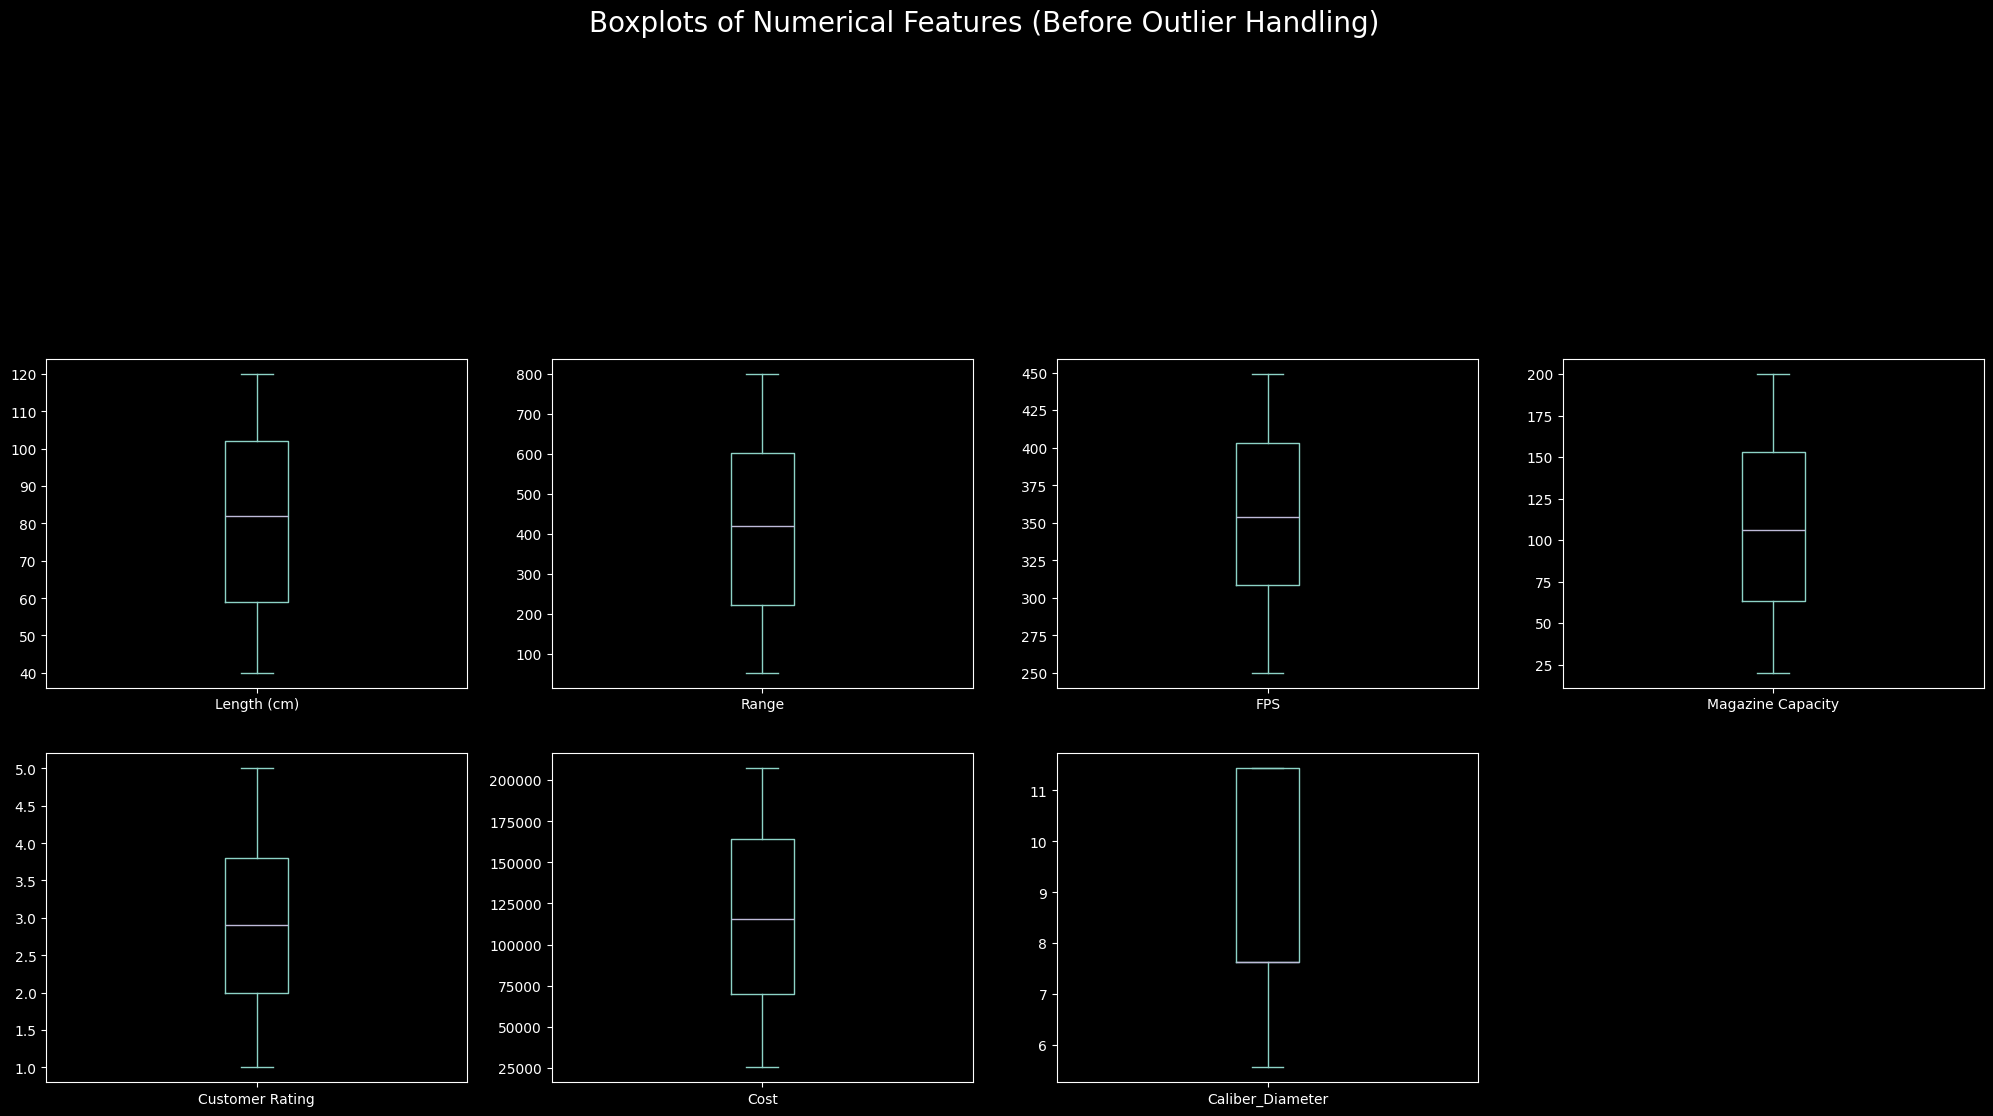

In [17]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
df[num_cols].plot(
    kind="box",
    subplots=True,
    figsize=(25, 35),
    layout=(7, 4),
    sharex=False,
    sharey=False
)

plt.suptitle("Boxplots of Numerical Features (Before Outlier Handling)", fontsize=20)
plt.show()


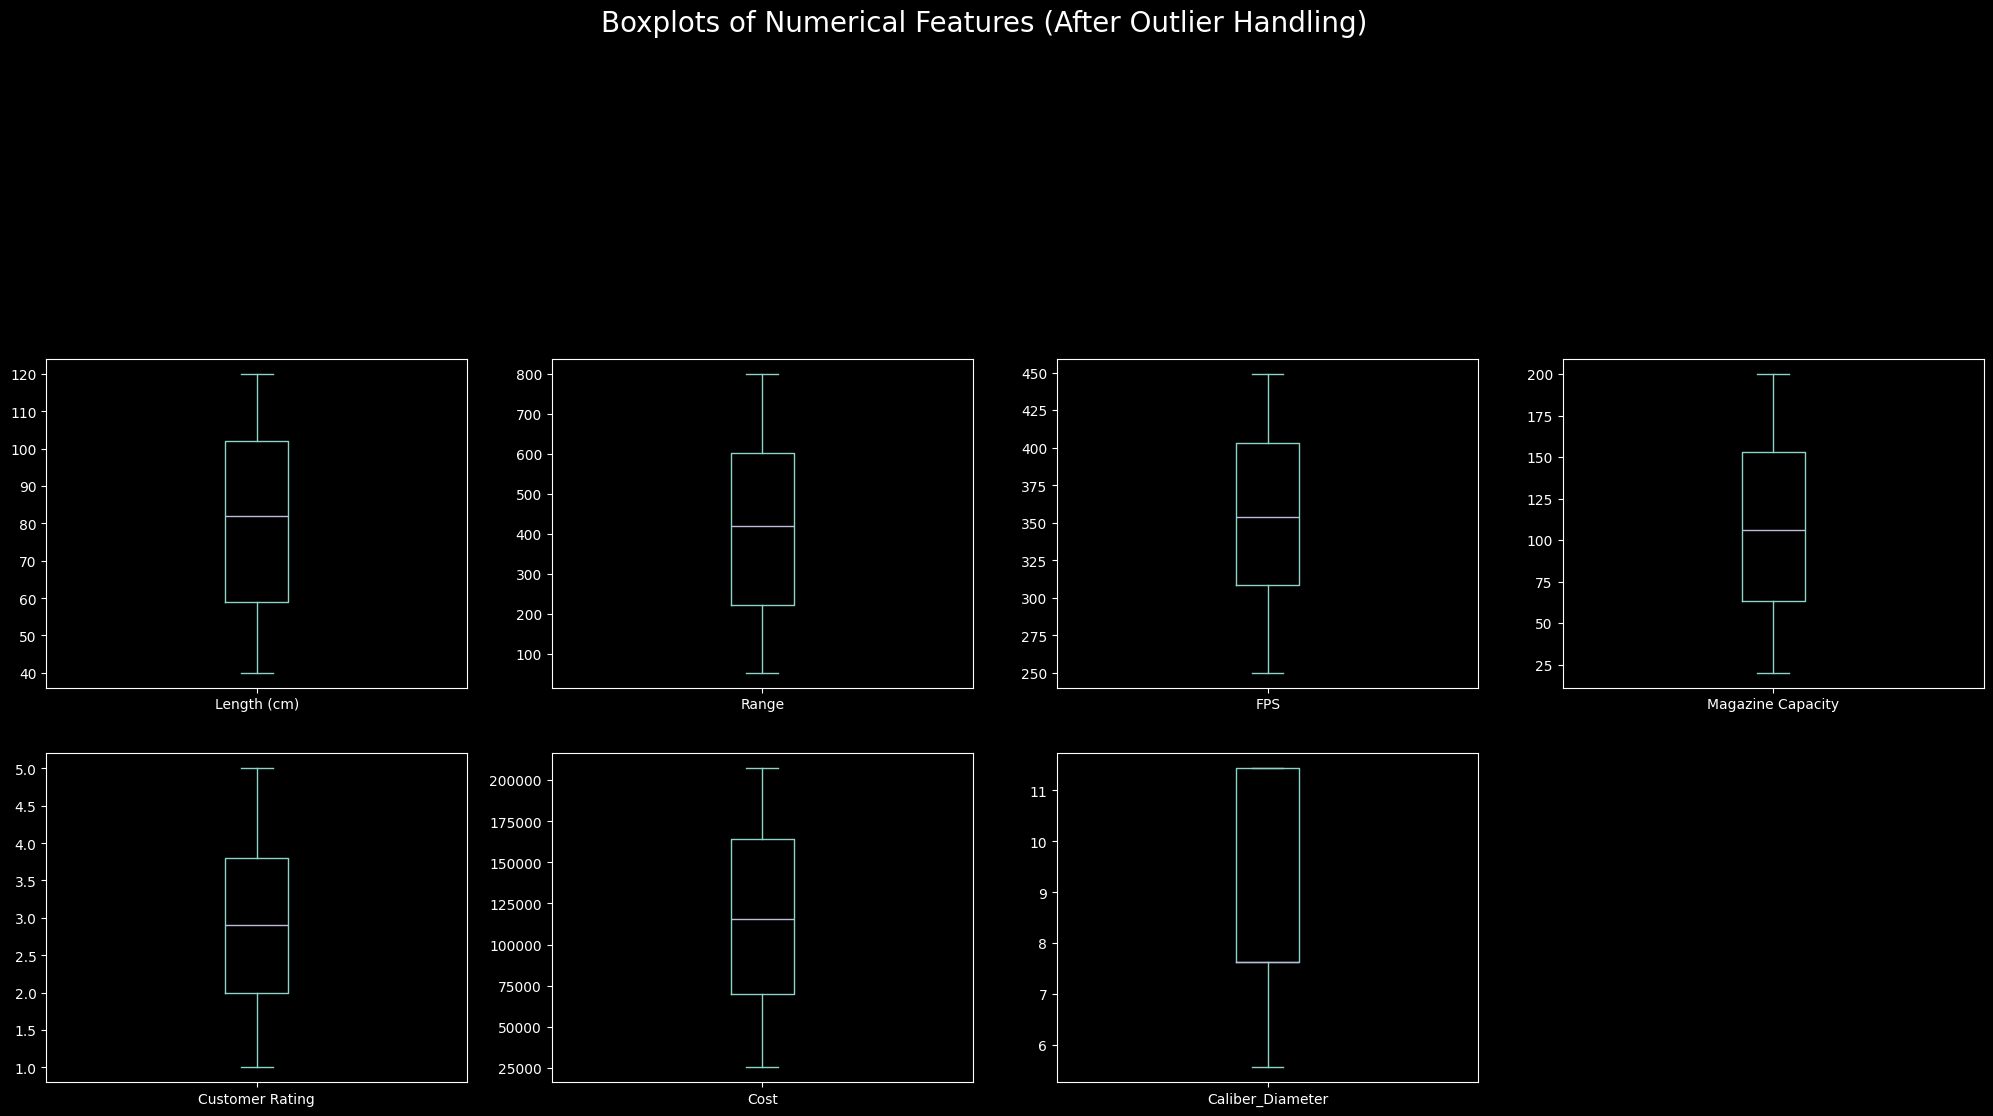

In [18]:
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['number']).columns.tolist()
df[num_cols].plot(
    kind="box",
    subplots=True,
    figsize=(25, 35),
    layout=(7, 4),
    sharex=False,
    sharey=False
)

plt.suptitle("Boxplots of Numerical Features (After Outlier Handling)", fontsize=20)
plt.show()


In [19]:
df[df["Cost"] == df["Cost"].max()]


,Weapon Name,Type,Length (cm),Range,Availability,Brand,FPS,Magazine Capacity,Power Source,Customer Rating,Cost,Caliber_Diameter,Caliber_Type
21,Rifle M767,Shotgun,99,465,In Stock,G&G,427,118,Electric,4.9,207085,7.62,mm


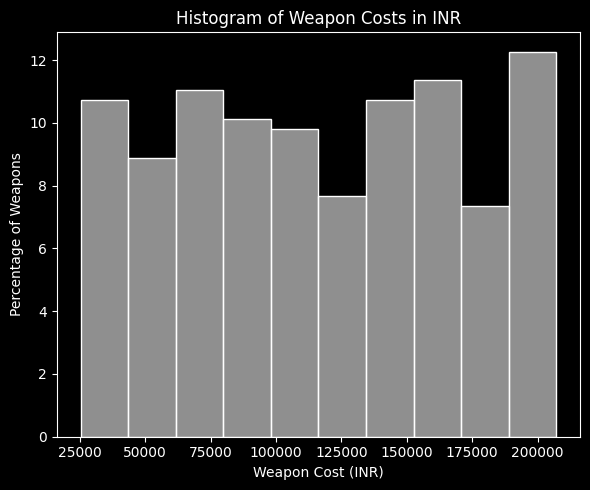

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")
plt.figure(figsize=(6,5))
sns.histplot(
    data=df, 
    x="Cost", 
    bins=10, 
    color="#C0C0C0", 
    stat="percent"
)

plt.xlabel("Weapon Cost (INR)")
plt.ylabel("Percentage of Weapons")
plt.title("Histogram of Weapon Costs in INR")
plt.tight_layout()
plt.show()


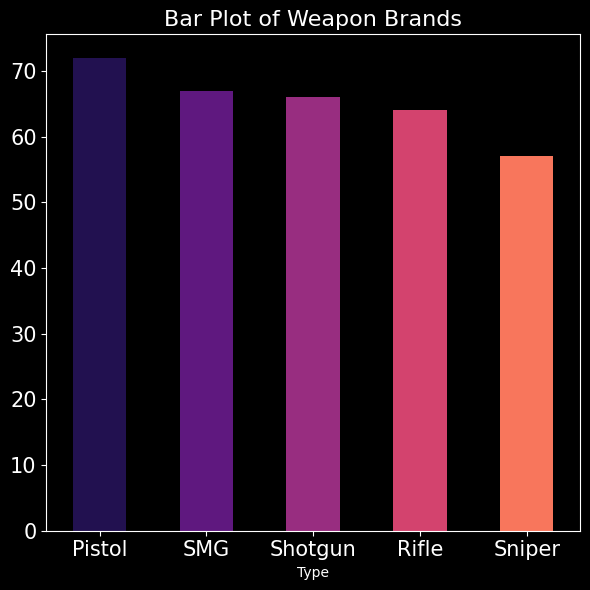

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))

# ✅ Bar plot of Brand_Name counts
df["Type"].value_counts().plot.bar(
    color=sns.color_palette("magma"),
    fontsize=15
)

plt.title("Bar Plot of Weapon Brands", fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# plt.savefig('brand_bar_cat.png')



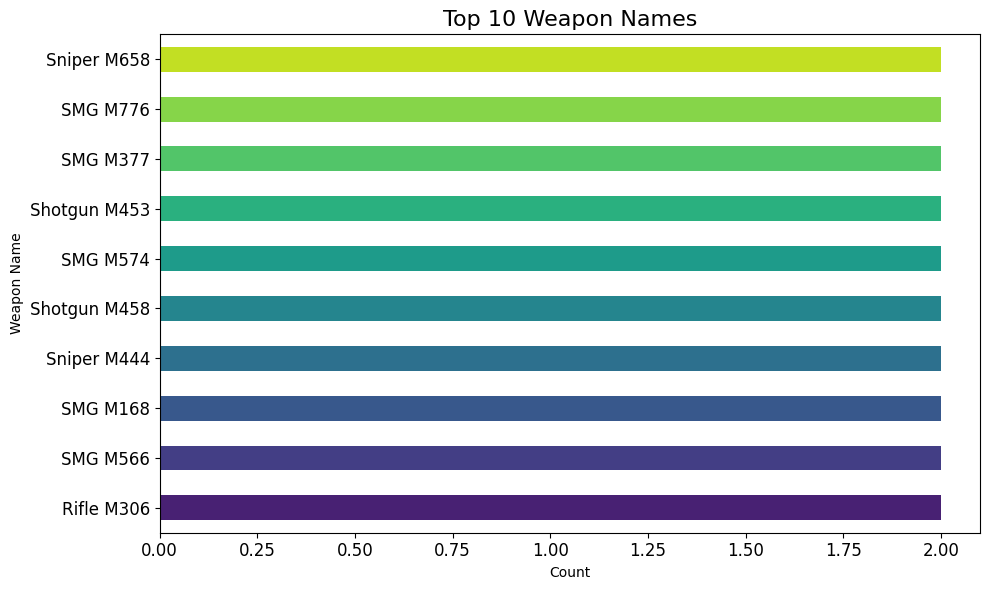

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# ✅ Top 10 weapon names
df["Weapon Name"].value_counts().nlargest(10).plot.barh(
    color=sns.color_palette("viridis", 10),  # changed color palette
    fontsize=12
)



plt.title("Top 10 Weapon Names", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Weapon Name")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


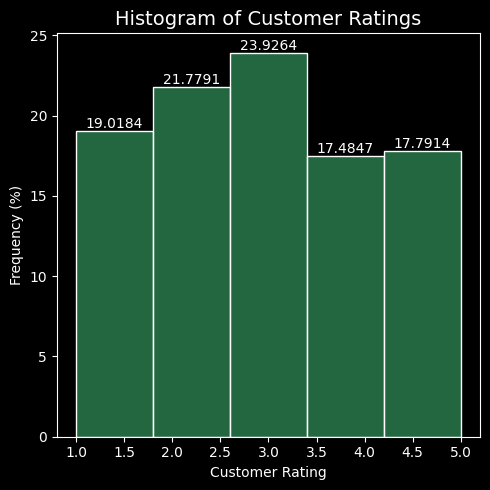

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))

# Histogram for Customer Rating
ax = sns.histplot(
    data=df,
    x=("Customer Rating"),
    bins=5,
    color="seagreen",   # changed color
    stat="percent"
)

for i in ax.containers:
    ax.bar_label(i)

plt.ylabel("Frequency (%)")
plt.xlabel("Customer Rating")
plt.title("Histogram of Customer Ratings", fontsize=14)
plt.tight_layout()
plt.show()


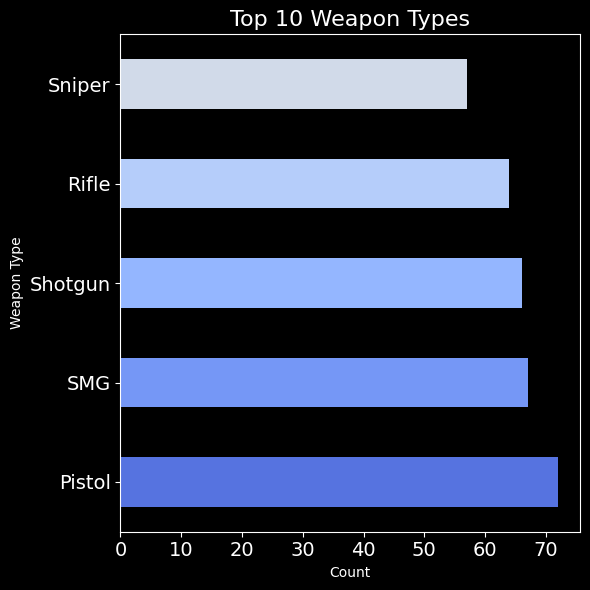

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))

df["Type"].value_counts().nlargest(10).plot.barh(
    color=sns.color_palette("coolwarm", 10),  # changed color palette
     fontsize=14
)

plt.title("Top 10 Weapon Types", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Weapon Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [75]:
def cat_num_plot(df, numerical_col, categorical_col):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=categorical_col, y=numerical_col, palette="Set2")
    plt.title(f'Boxplot of {numerical_col} vs {categorical_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


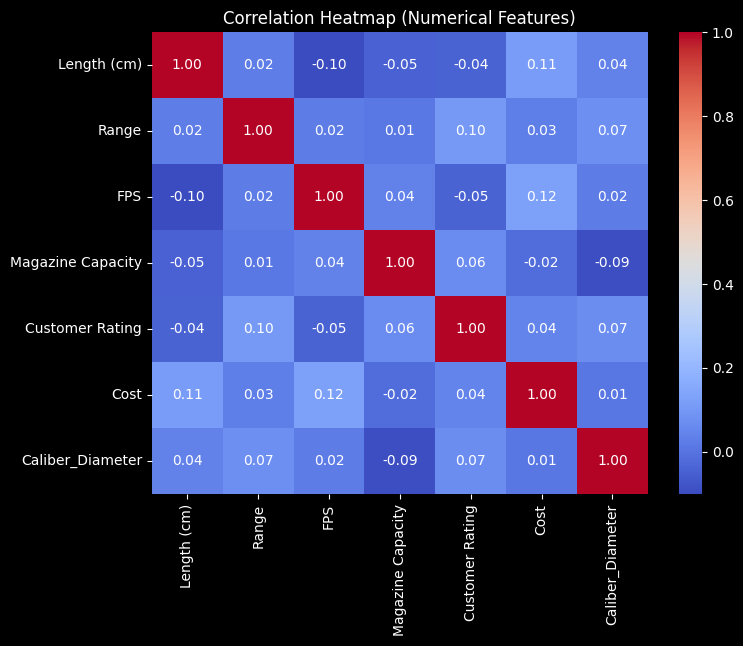

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [33]:
df.columns

Index(['Weapon Name', 'Type', 'Length (cm)', 'Range', 'Availability', 'Brand',
       'FPS', 'Magazine Capacity', 'Power Source', 'Customer Rating', 'Cost',
       'Caliber_Diameter', 'Caliber_Type'],
      dtype='object')

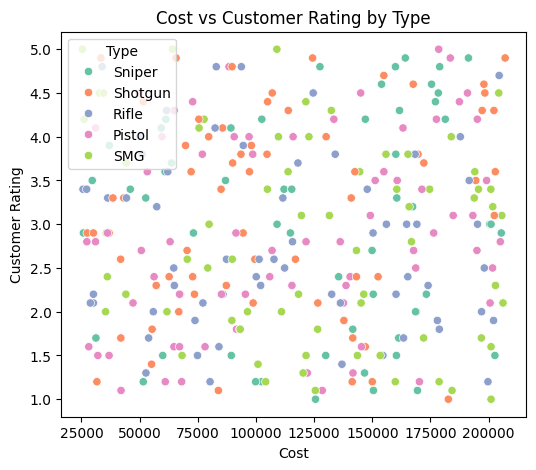

In [39]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Cost", y="Customer Rating", hue="Type", data=df, palette="Set2")
plt.title("Cost vs Customer Rating by Type")
plt.show()


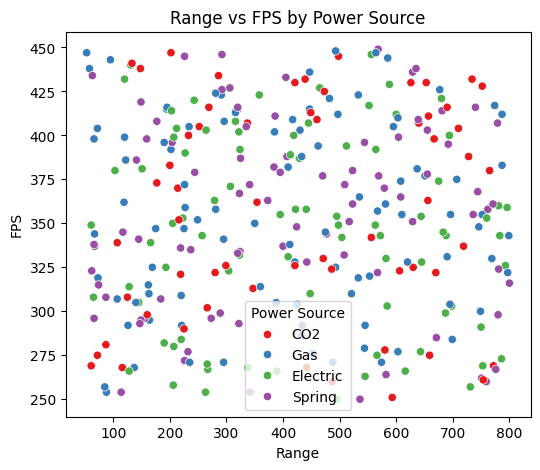

In [40]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Range", y="FPS", hue="Power Source", data=df, palette="Set1")
plt.title("Range vs FPS by Power Source")
plt.show()


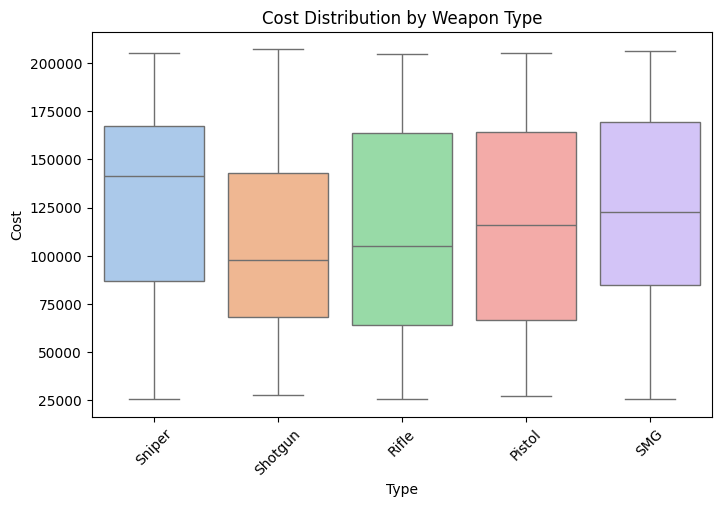

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Type", y="Cost", data=df, palette="pastel")
plt.title("Cost Distribution by Weapon Type")
plt.xticks(rotation=45)
plt.show()


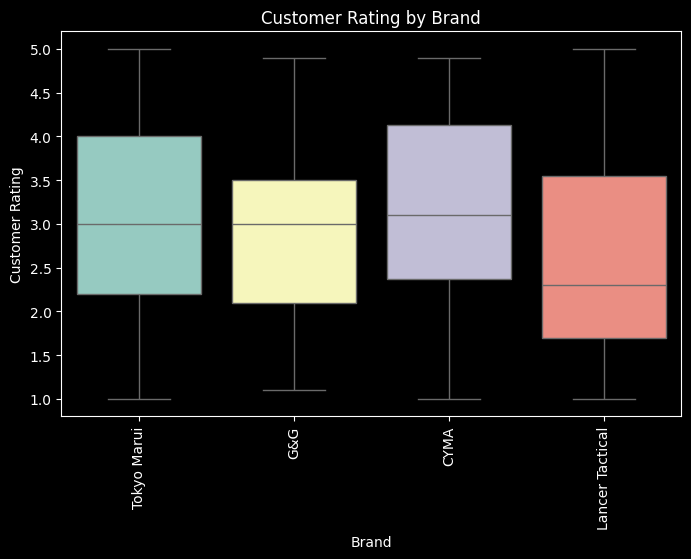

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Brand", y="Customer Rating", data=df, palette="Set3")
plt.title("Customer Rating by Brand")
plt.xticks(rotation=90)
plt.show()


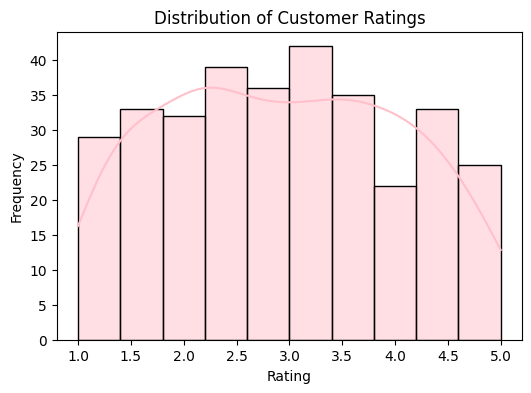

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df["Customer Rating"], bins=10, kde=True, color="pink")
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


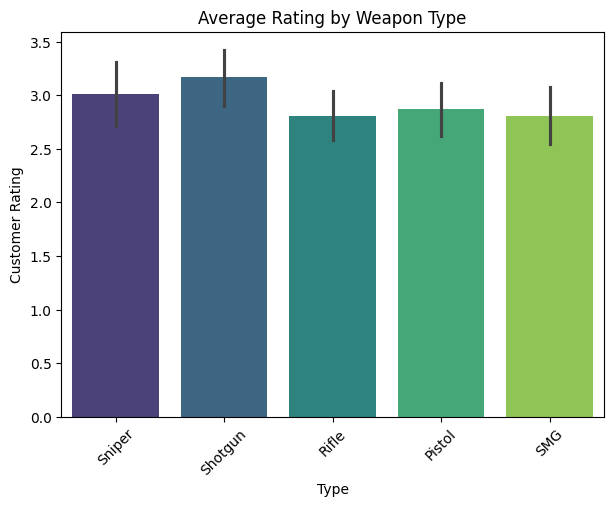

In [29]:

plt.figure(figsize=(7,5))
sns.barplot(x="Type", y="Customer Rating", data=df, estimator=lambda x: round(x.mean(),2), palette="viridis")
plt.title("Average Rating by Weapon Type")
plt.xticks(rotation=45)
plt.show()



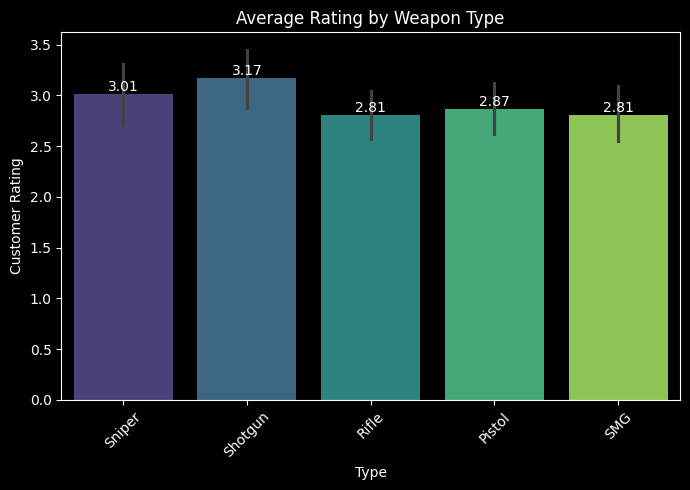

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))

# ✅ Bar plot of average customer rating by weapon type
ax = sns.barplot(
    x="Type", 
    y="Customer Rating", 
    data=df, 
    estimator=lambda x: round(x.mean(), 2), 
    palette="viridis"
)

plt.title("Average Rating by Weapon Type")
plt.xticks(rotation=45)

# ✅ Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")

plt.tight_layout()
plt.show()


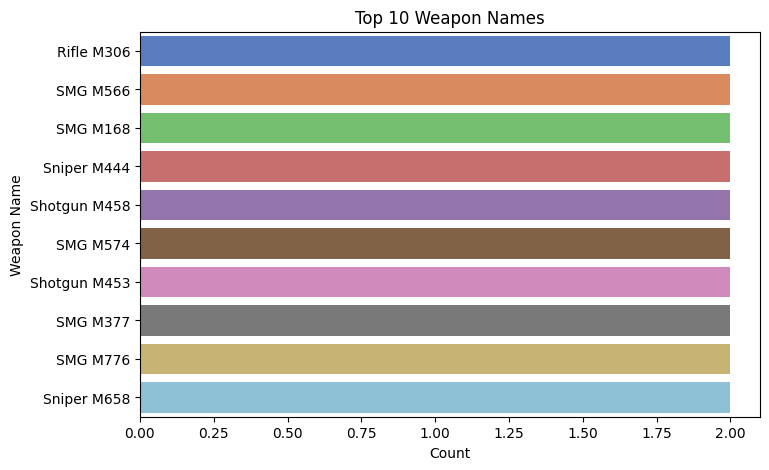

In [47]:
plt.figure(figsize=(8,5))
top_names = df["Weapon Name"].value_counts().head(10)
sns.barplot(x=top_names.values, y=top_names.index, palette="muted")
plt.title("Top 10 Weapon Names")
plt.xlabel("Count")
plt.ylabel("Weapon Name")
plt.show()


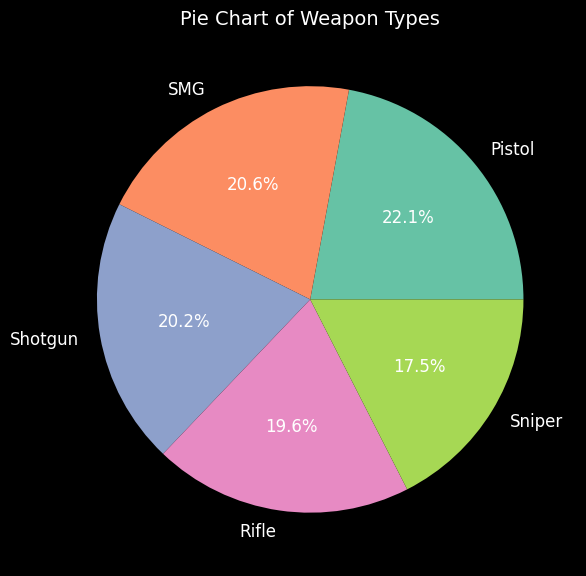

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))


df["Type"].value_counts().nlargest(10).plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2'),
    textprops={'fontsize': 12}
)

plt.title("Pie Chart of Weapon Types", fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


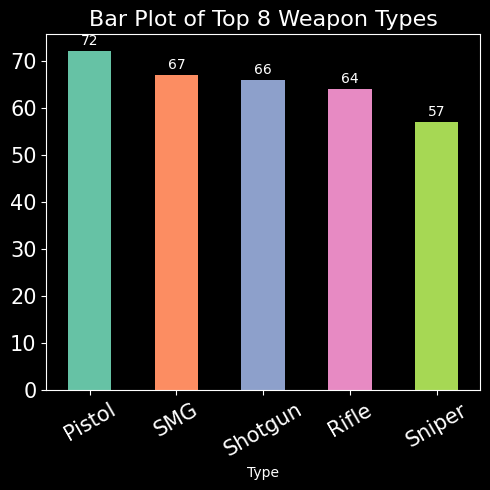

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))

# ✅ Create bar plot
ax = df["Type"].value_counts().nlargest(8).plot.bar(
    color=sns.color_palette('Set2'),
    fontsize=15
)

# ✅ Add labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=2)

# ✅ Title & style
plt.title("Bar Plot of Top 8 Weapon Types", fontsize=16)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


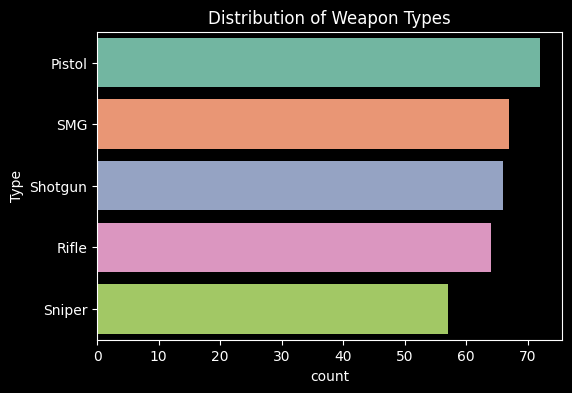

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(y="Type", data=df, palette="Set2", order=df["Type"].value_counts().index)
plt.title("Distribution of Weapon Types")
plt.show()


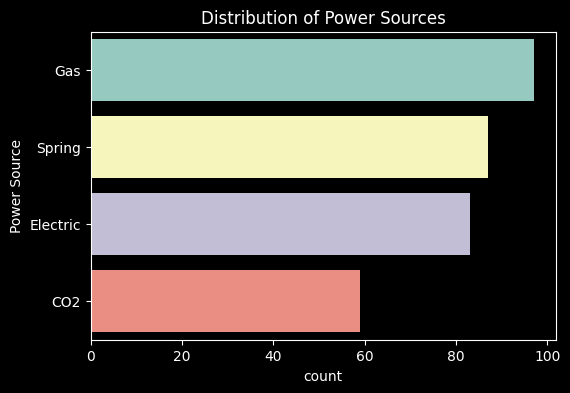

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(y="Power Source", data=df, palette="Set3", order=df["Power Source"].value_counts().index)
plt.title("Distribution of Power Sources")
plt.show()


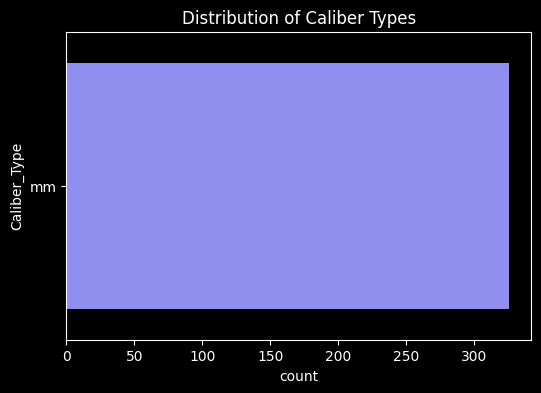

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(y="Caliber_Type", data=df, palette="cool", order=df["Caliber_Type"].value_counts().index)
plt.title("Distribution of Caliber Types")
plt.show()


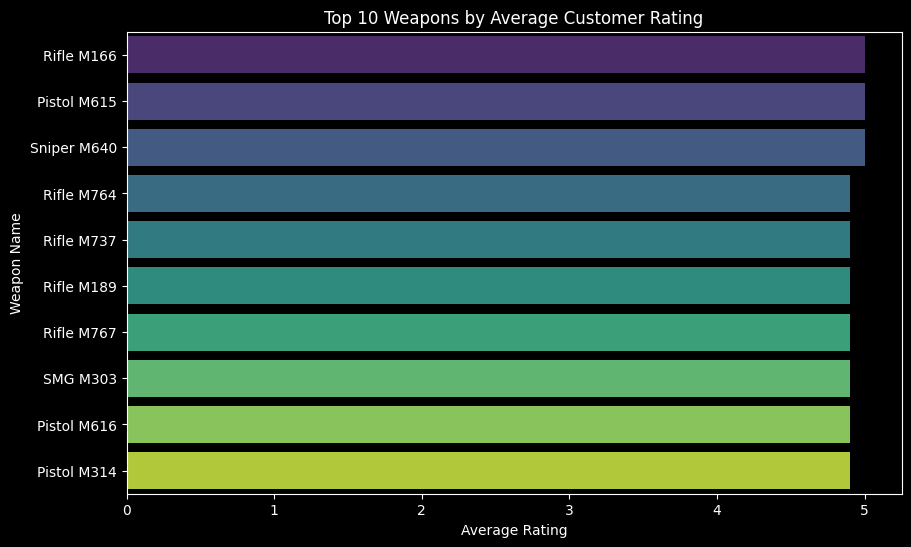

In [37]:
top_rated = df.groupby("Weapon Name")["Customer Rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_rated.values, y=top_rated.index, palette="viridis")
plt.title("Top 10 Weapons by Average Customer Rating")
plt.xlabel("Average Rating")
plt.ylabel("Weapon Name")
plt.show()


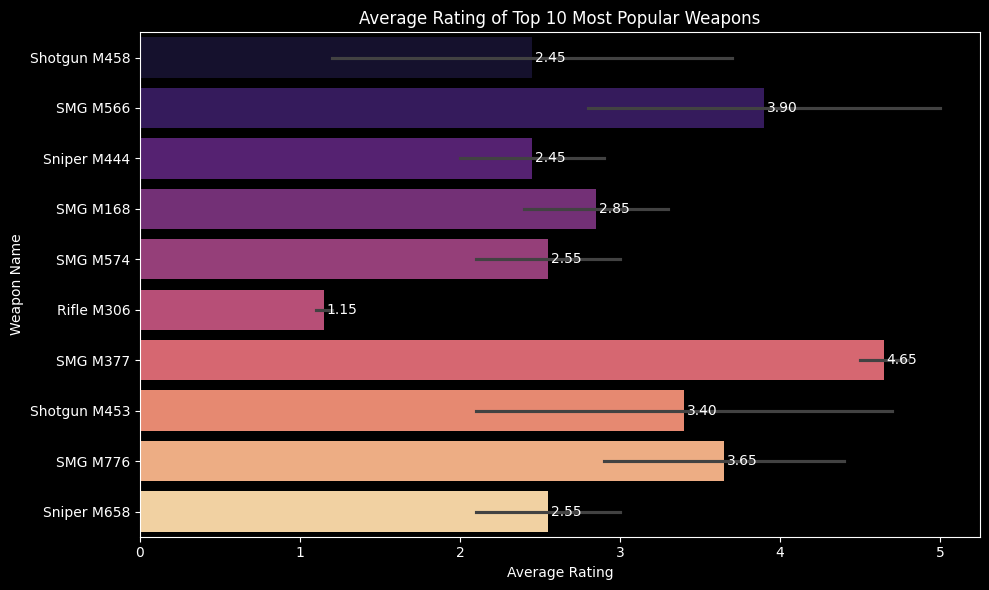

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


top_popular = df["Weapon Name"].value_counts().head(10).index

plt.figure(figsize=(10,6))


ax = sns.barplot(
    x="Customer Rating", 
    y="Weapon Name", 
    data=df[df["Weapon Name"].isin(top_popular)], 
    palette="magma", 
    estimator=lambda x: round(x.mean(),2)
)


for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type='edge', fontsize=10, padding=2)


plt.title("Average Rating of Top 10 Most Popular Weapons")
plt.xlabel("Average Rating")
plt.ylabel("Weapon Name")
plt.tight_layout()
plt.show()


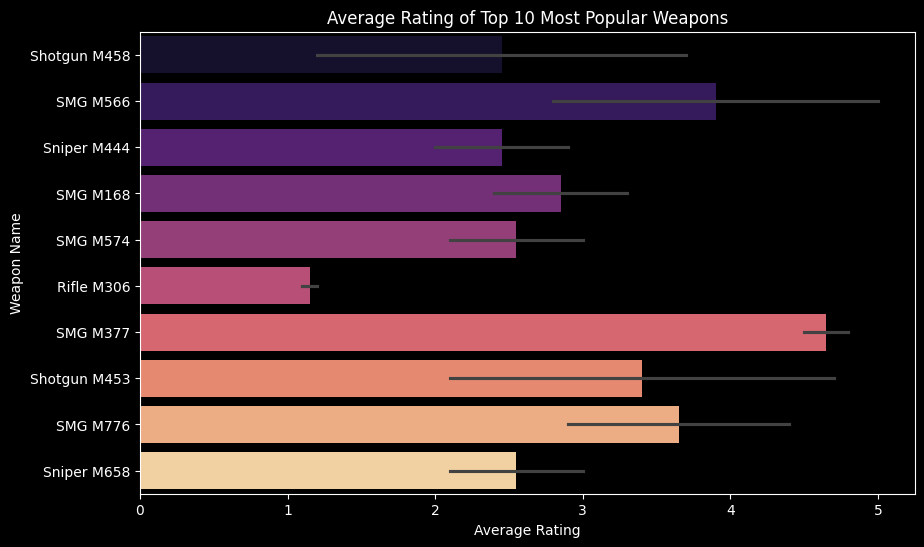

In [62]:
top_popular = df["Weapon Name"].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.barplot(x="Customer Rating", y="Weapon Name", data=df[df["Weapon Name"].isin(top_popular)], 
            palette="magma", estimator=lambda x: round(x.mean(),2))
plt.title("Average Rating of Top 10 Most Popular Weapons")
plt.xlabel("Average Rating")
plt.ylabel("Weapon Name")
plt.show()


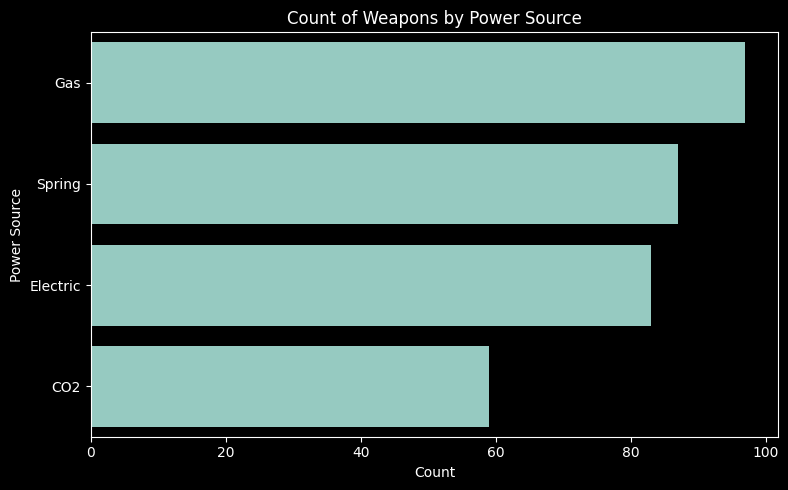

In [63]:
plt.figure(figsize=(8,5))
order = df["Power Source"].value_counts().index
sns.countplot(y="Power Source", data=df, order=order)
plt.title("Count of Weapons by Power Source")
plt.xlabel("Count")
plt.ylabel("Power Source")
plt.tight_layout()
plt.show()



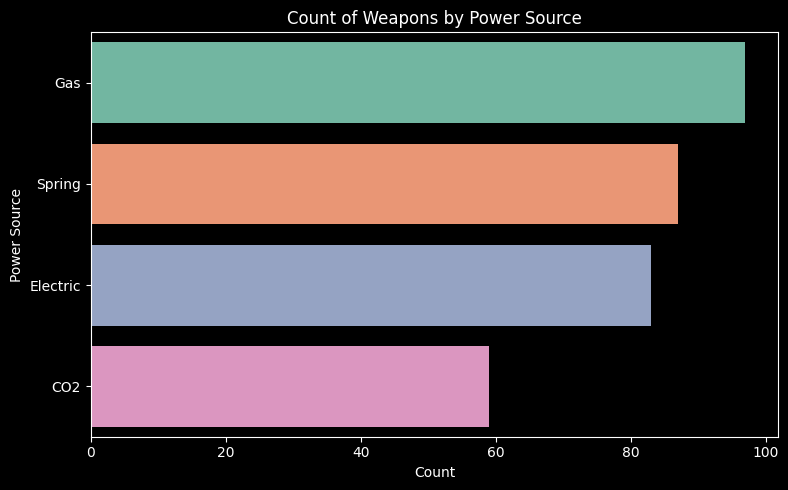

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
order = df["Power Source"].value_counts().index

sns.countplot(
    y="Power Source", 
    data=df, 
    order=order, 
    palette="Set2"   # ✅ added color palette
)

plt.title("Count of Weapons by Power Source")
plt.xlabel("Count")
plt.ylabel("Power Source")
plt.tight_layout()
plt.show()


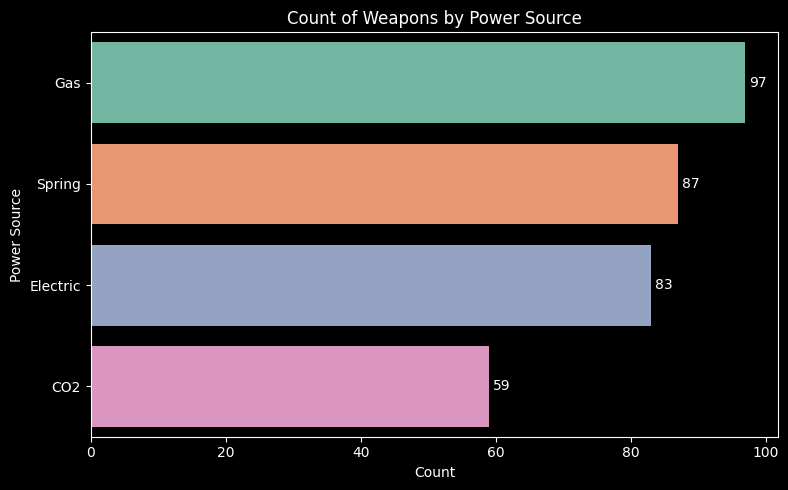

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
order = df["Power Source"].value_counts().index

# ✅ Create countplot and assign to ax
ax = sns.countplot(
    y="Power Source", 
    data=df, 
    order=order, 
    palette="Set2"
)

# ✅ Add count labels to bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.title("Count of Weapons by Power Source")
plt.xlabel("Count")
plt.ylabel("Power Source")
plt.tight_layout()
plt.show()


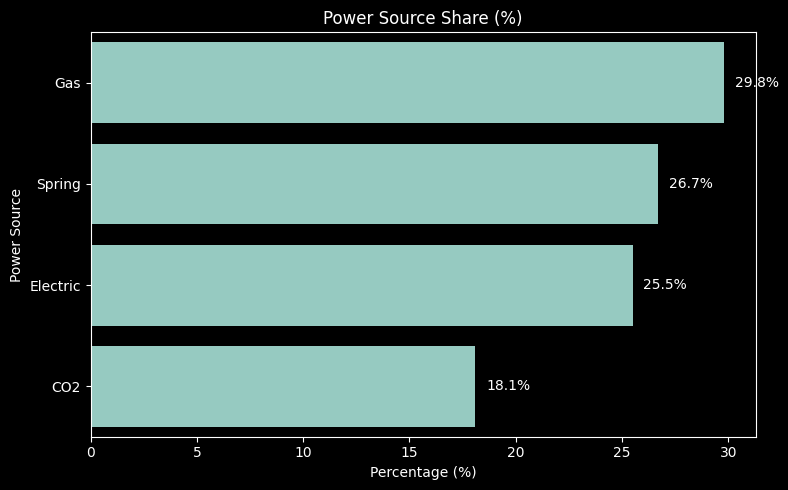

In [66]:
pct = df["Power Source"].value_counts(normalize=True).mul(100).round(1)
plt.figure(figsize=(8,5))
sns.barplot(x=pct.values, y=pct.index)
plt.title("Power Source Share (%)")
plt.xlabel("Percentage (%)")
plt.ylabel("Power Source")
for i, v in enumerate(pct.values):
    plt.text(v + 0.5, i, f"{v}%", va='center')
plt.tight_layout()
plt.show()


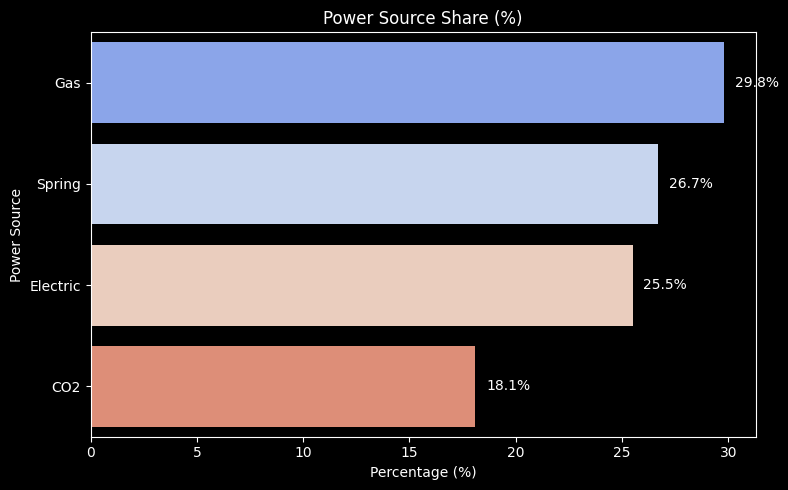

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
pct = df["Power Source"].value_counts(normalize=True).mul(100).round(1)

plt.figure(figsize=(8,5))
sns.barplot(
    x=pct.values, 
    y=pct.index, 
    palette="coolwarm"  
)

plt.title("Power Source Share (%)")
plt.xlabel("Percentage (%)")
plt.ylabel("Power Source")

for i, v in enumerate(pct.values):
    plt.text(v + 0.5, i, f"{v}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()


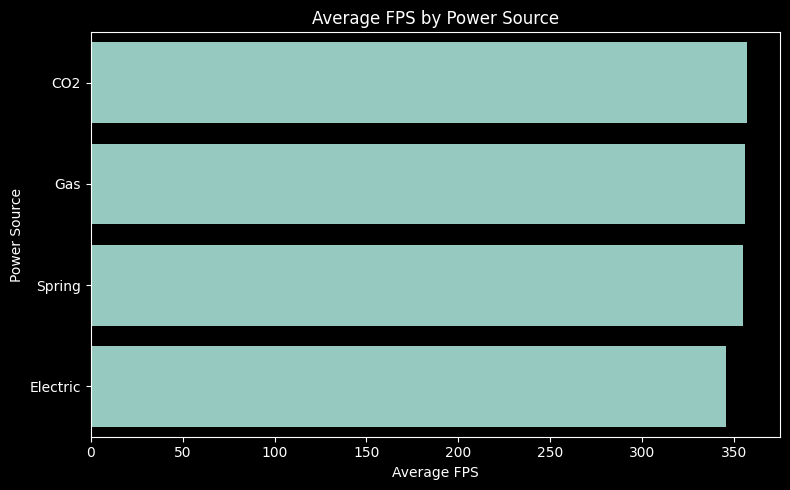

In [68]:
if "FPS" in df.columns:
    plt.figure(figsize=(8,5))
    fps_by_power = df.groupby("Power Source")["FPS"].mean().sort_values(ascending=False)
    sns.barplot(x=fps_by_power.values, y=fps_by_power.index)
    plt.title("Average FPS by Power Source")
    plt.xlabel("Average FPS")
    plt.ylabel("Power Source")
    plt.tight_layout()
    plt.show()


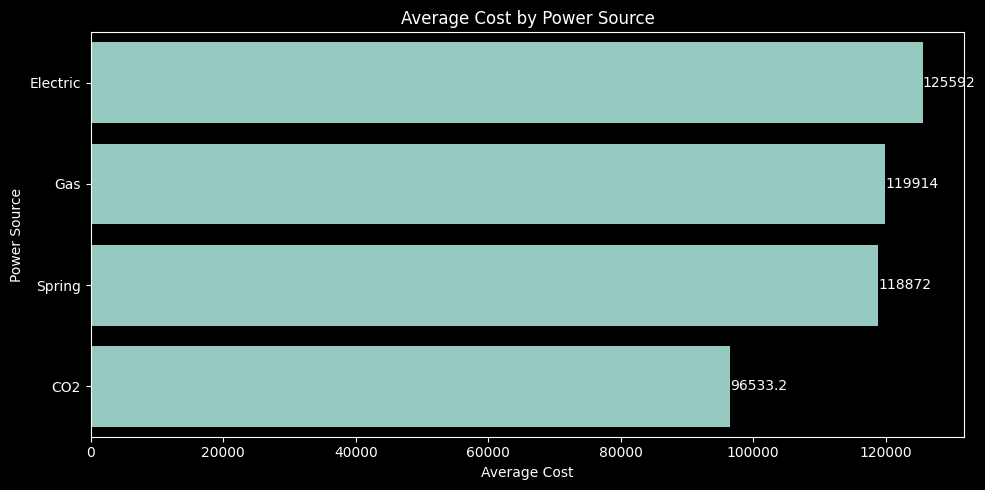

In [69]:
if "Cost" in df.columns:
    plt.figure(figsize=(10,5))
    cost_by_power = df.groupby("Power Source")["Cost"].mean().sort_values(ascending=False)
    ax = sns.barplot(x=cost_by_power.values, y=cost_by_power.index)

    for i in ax.containers:
        ax.bar_label(i)    
    
    plt.title("Average Cost by Power Source")
    plt.xlabel("Average Cost")
    plt.ylabel("Power Source")
    plt.tight_layout()
    plt.show()


In [70]:
import pandas as pd

num = "Cost"   #  numerical column
cat = "Type"   #  categorical column

print(df.groupby(cat)[num].agg(['mean', 'median', 'min', 'max']))


                  mean    median    min     max
Type                                           
Pistol   115194.777778  115702.0  27307  205010
Rifle    111803.593750  104870.5  25647  204512
SMG      125394.417910  122757.0  25398  206172
Shotgun  107547.878788   97608.0  27473  207085
Sniper   125334.368421  141598.0  25813  205425


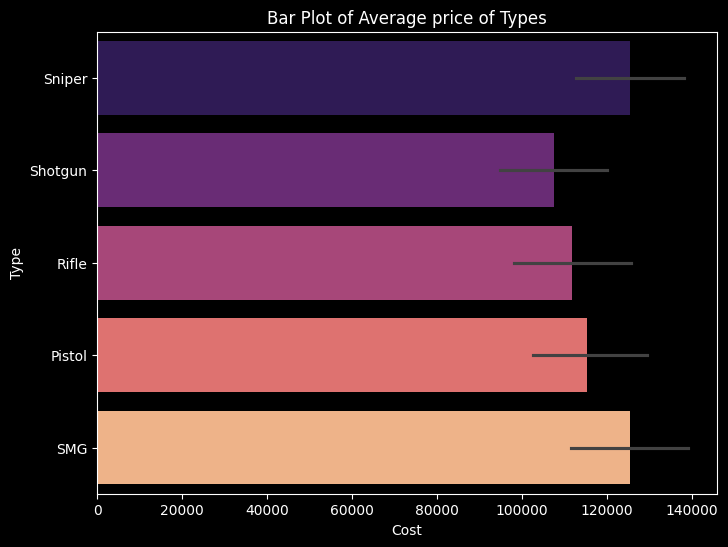

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
sns.barplot(data=df, x=num, y=cat, palette="magma", estimator=np.mean)
plt.title(f"Bar Plot of Average price of Types")
plt.show()


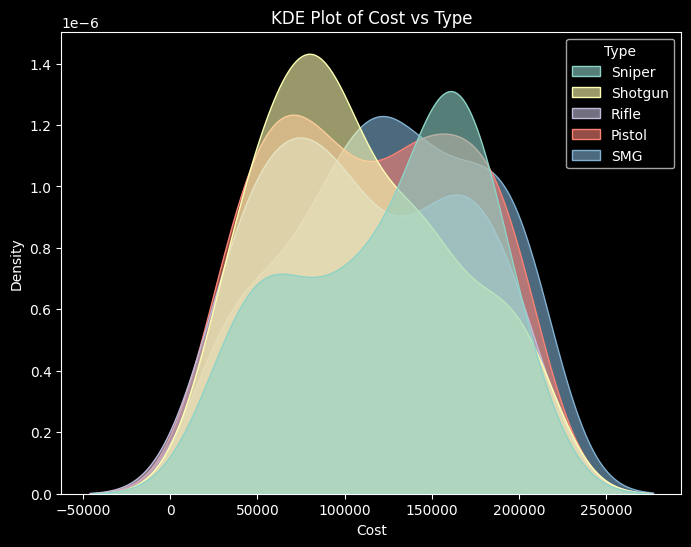

In [72]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x=num, hue=cat, fill=True, alpha=0.6)
plt.title(f"KDE Plot of {num} vs {cat}")
plt.show()


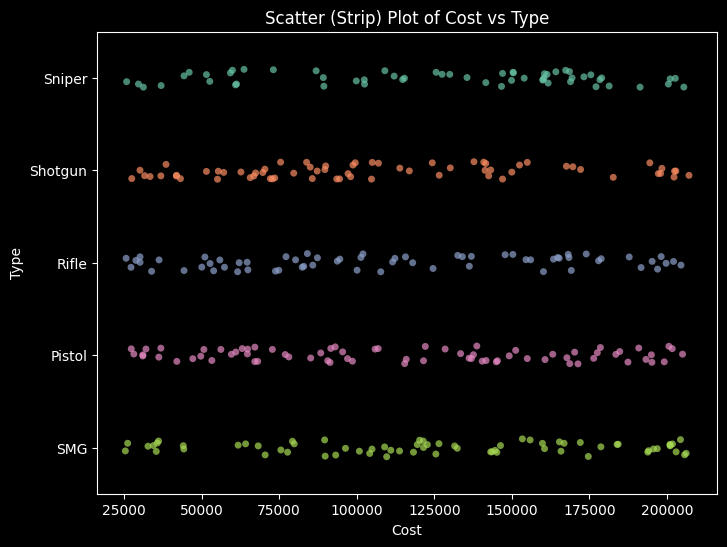

In [73]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df, x=num, y=cat, jitter=True, palette="Set2", alpha=0.7)
plt.title(f"Scatter (Strip) Plot of {num} vs {cat}")
plt.show()


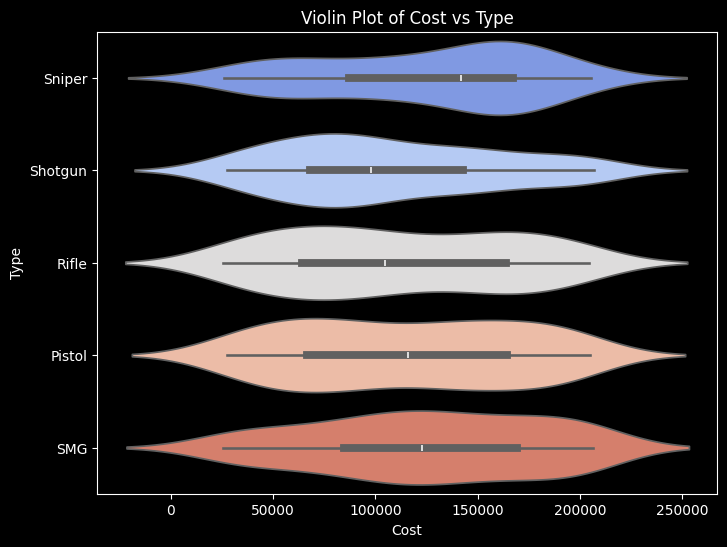

In [74]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x=num, y=cat, palette="coolwarm")
plt.title(f"Violin Plot of {num} vs {cat}")
plt.show()


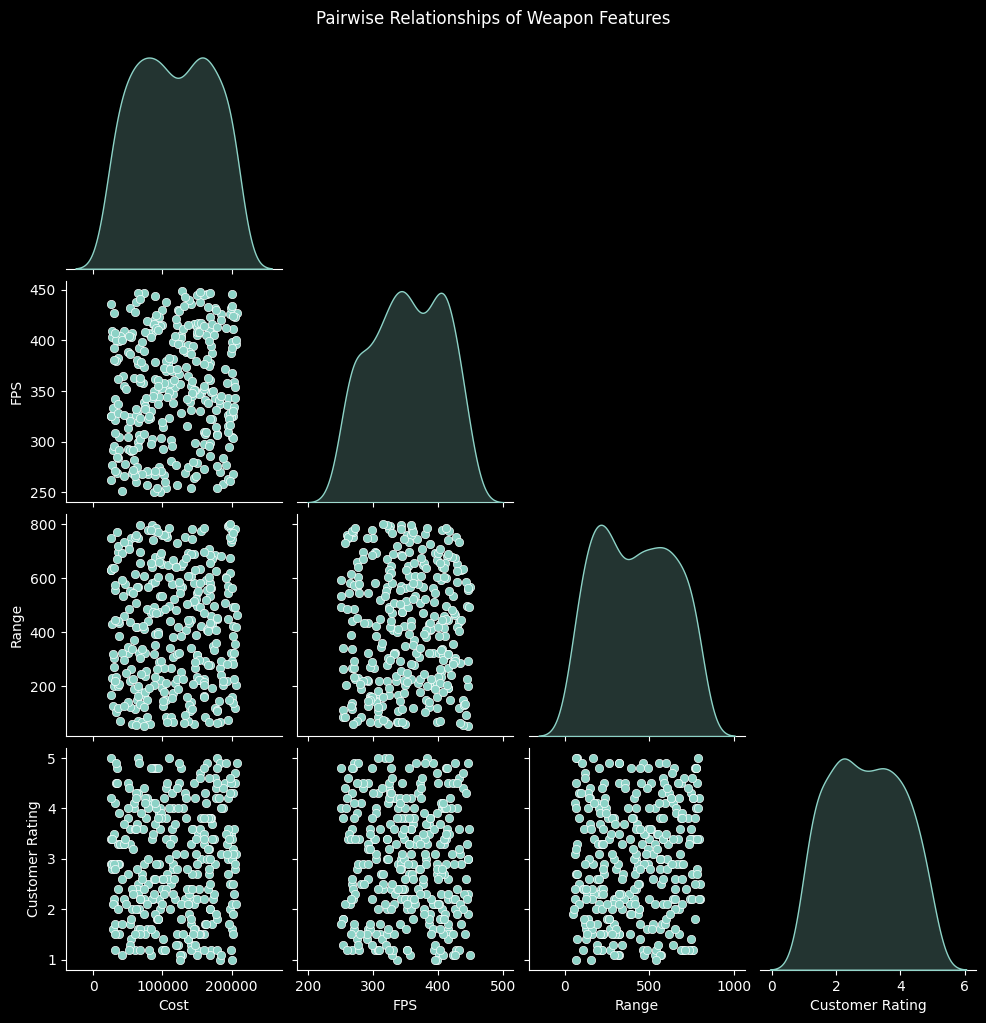

In [75]:
sns.pairplot(df[["Cost", "FPS", "Range", "Customer Rating"]], diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships of Weapon Features", y=1.02)
plt.show()

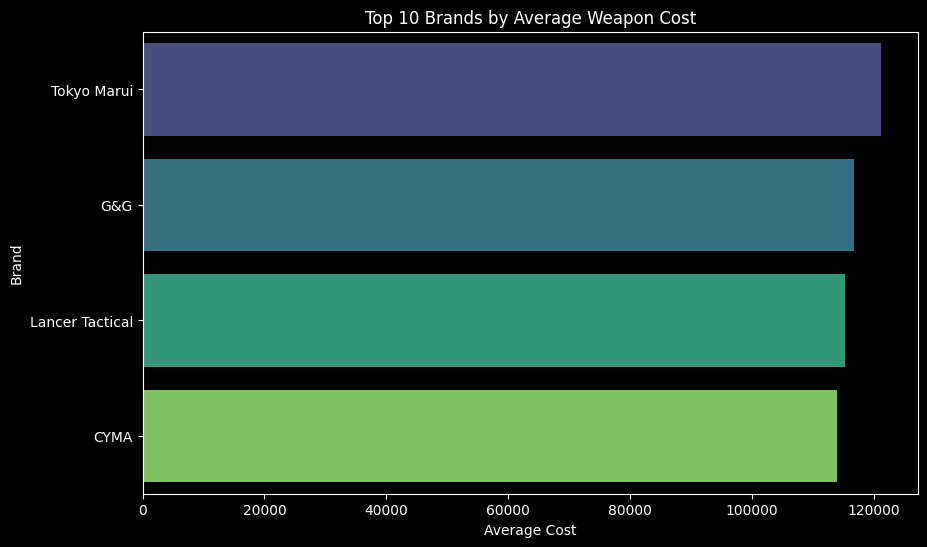

In [76]:
plt.figure(figsize=(10,6))
brand_cost = df.groupby("Brand")["Cost"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=brand_cost.values, y=brand_cost.index, palette="viridis")
plt.title("Top 10 Brands by Average Weapon Cost")
plt.xlabel("Average Cost")
plt.ylabel("Brand")
plt.show()


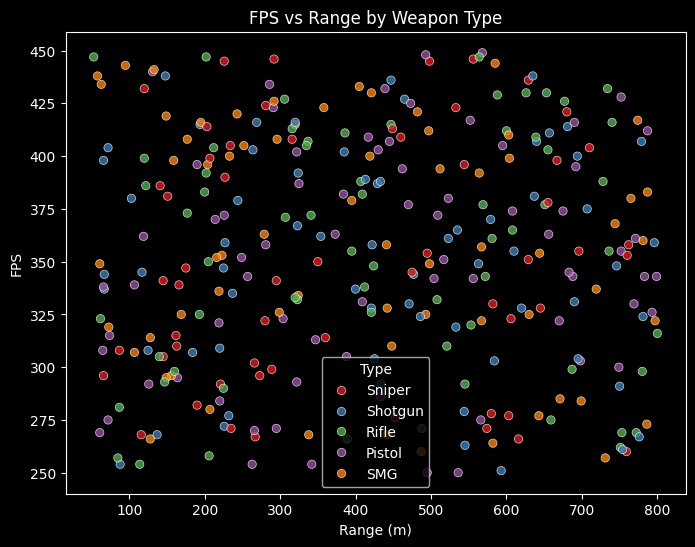

In [77]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Range", y="FPS", hue="Type", palette="Set1", alpha=0.8)
plt.title("FPS vs Range by Weapon Type")
plt.xlabel("Range (m)")
plt.ylabel("FPS")
plt.show()


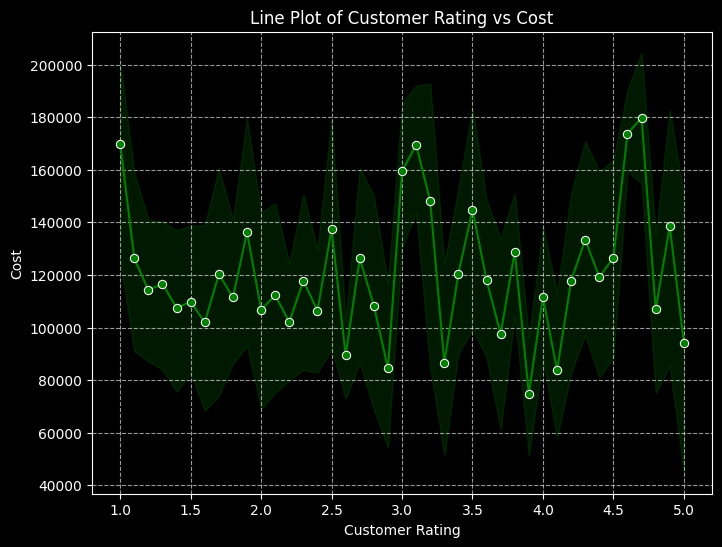

In [78]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="Customer Rating", y="Cost", color="green", marker="o")
plt.title("Line Plot of Customer Rating vs Cost")
plt.xlabel("Customer Rating")
plt.ylabel("Cost")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [79]:

df.columns

Index(['Weapon Name', 'Type', 'Length (cm)', 'Range', 'Availability', 'Brand',
       'FPS', 'Magazine Capacity', 'Power Source', 'Customer Rating', 'Cost',
       'Caliber_Diameter', 'Caliber_Type'],
      dtype='object')

<Axes: xlabel='Customer Rating', ylabel='FPS'>

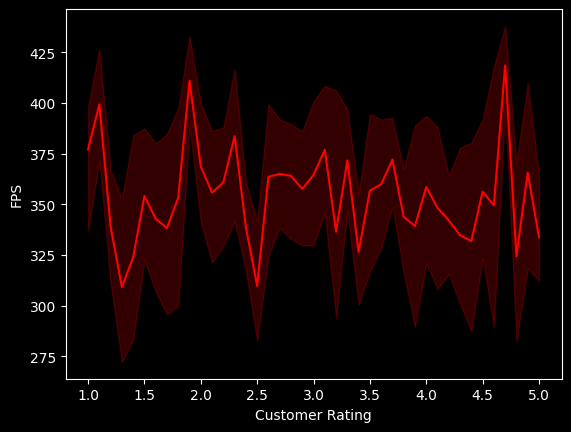

In [80]:
sns.lineplot(data = df , x = "Customer Rating" , y = "FPS" , color = "red")

<Axes: xlabel='Caliber_Diameter', ylabel='Availability'>

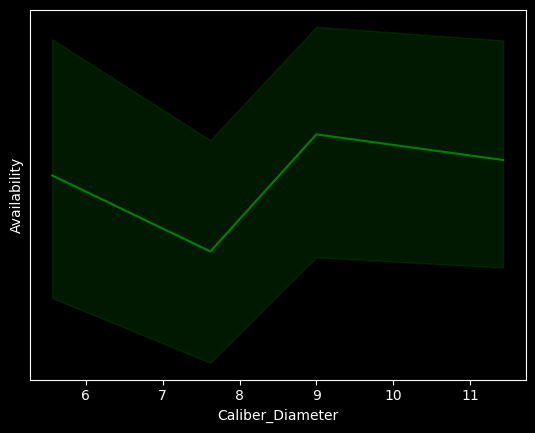

In [81]:
sns.lineplot(data = df , x = "Caliber_Diameter" , y = "Availability" , color = "green")

<Axes: xlabel='Weapon Name', ylabel='Range'>

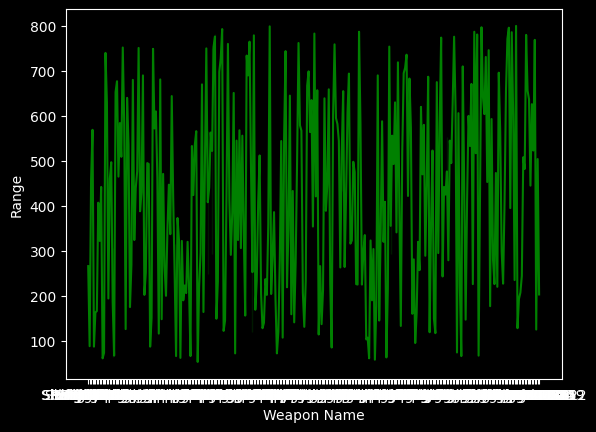

In [82]:
sns.lineplot(data = df, x = "Weapon Name" , y = "Range" , color = "green")

<Axes: xlabel='Type', ylabel='Range'>

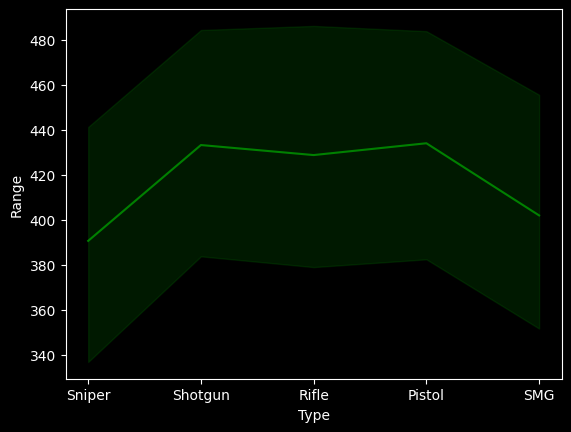

In [83]:
sns.lineplot(data = df, x = "Type" , y = "Range" , color = "green")

<Axes: xlabel='Cost', ylabel='Customer Rating'>

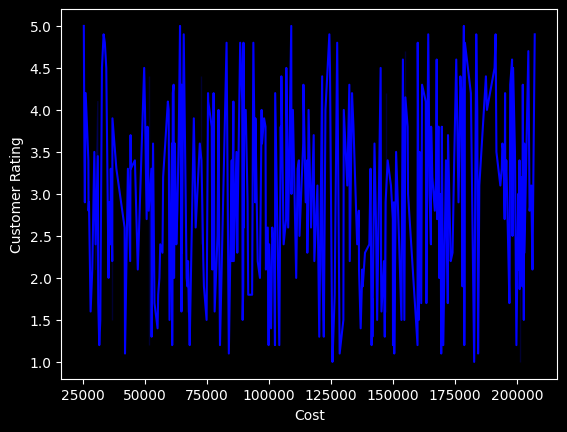

In [84]:
sns.lineplot(data = df , x = "Cost" , y = "Customer Rating" , color = "blue")

<Axes: xlabel='Type', ylabel='Range'>

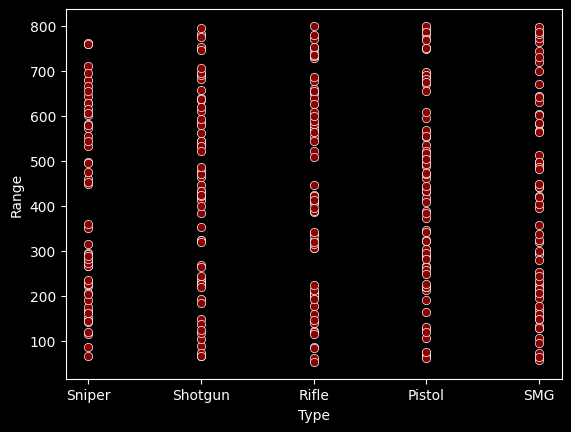

In [85]:
sns.scatterplot(x='Type', y='Range', data=df, color= "darkred")

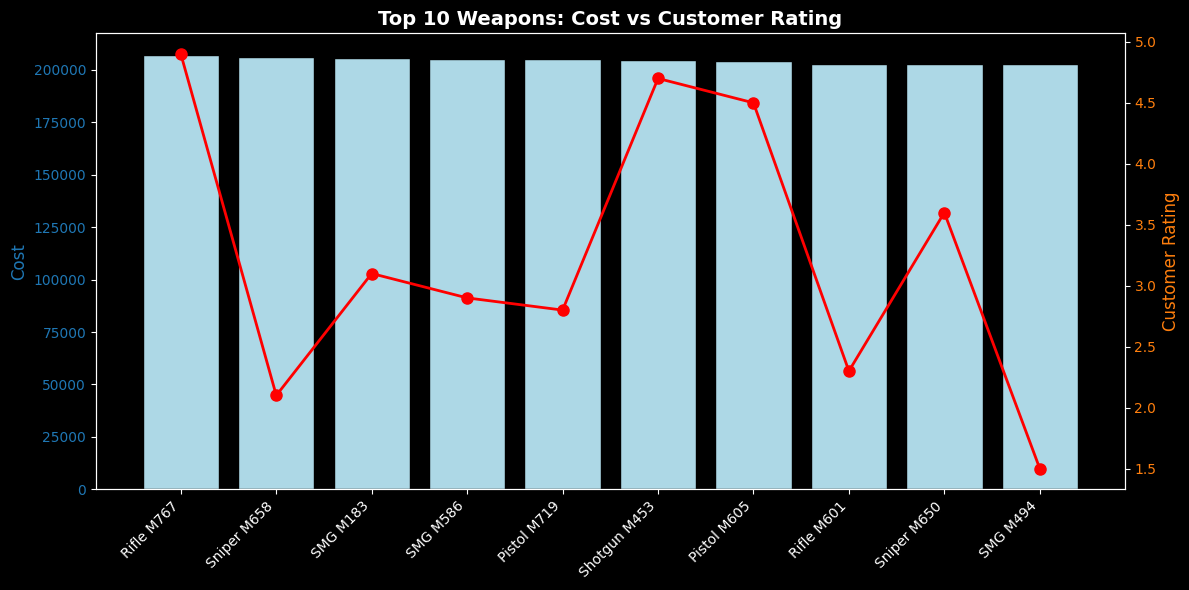

In [86]:
import matplotlib.pyplot as plt

# Top 10 most expensive weapons
top_df = df.nlargest(10, 'Cost')[['Weapon Name', 'Customer Rating', 'Cost']]

fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Bar for Cost ---
ax1.bar(top_df['Weapon Name'], top_df['Cost'], 
        color='lightblue', edgecolor='black', label='Cost')   # blue bars with black edges
ax1.set_ylabel('Cost', color='#1f77b4', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.set_xticklabels(top_df['Weapon Name'], rotation=45, ha='right')

# --- Second y-axis for Customer Rating ---
ax2 = ax1.twinx()
ax2.plot(top_df['Weapon Name'], top_df['Customer Rating'], 
         color='red', marker='o', linewidth=2, markersize=8, label='Customer Rating')  # orange line
ax2.set_ylabel('Customer Rating', color='#ff7f0e', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# --- Title & Layout ---
plt.title('Top 10 Weapons: Cost vs Customer Rating', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


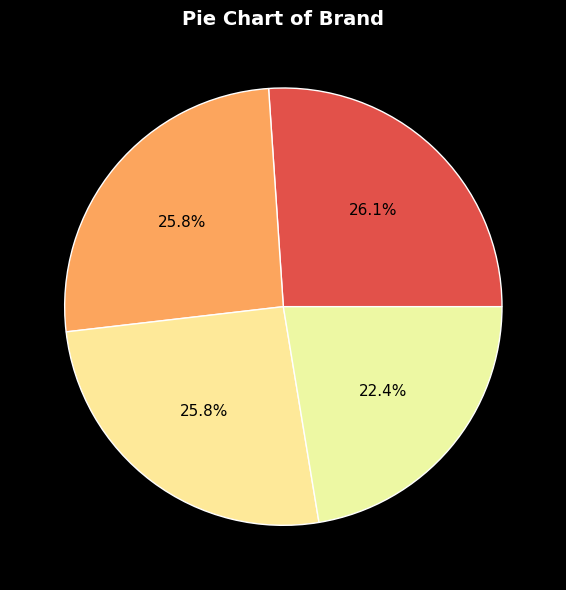

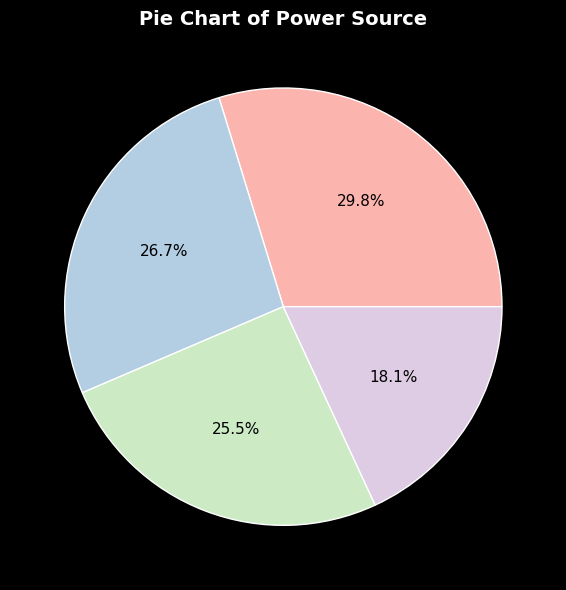

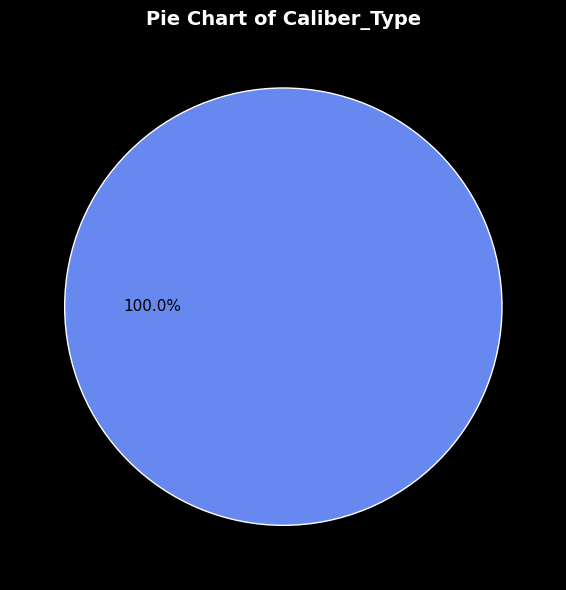

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

def cat_pie(df, col, head=10, palette='Set2'):
    
    colors = sns.color_palette(palette, n_colors=head)

    # Top categories
    top_values = df[col].value_counts().nlargest(head)

    # Pie Chart
    plt.figure(figsize=(6,6))
    top_values.plot.pie(
        autopct='%1.1f%%',
        colors=colors,
        textprops={'fontsize': 11, 'color':'black'},
        wedgeprops={'edgecolor':'white'}
    )
    plt.title(f'Pie Chart of {col}', fontsize=14, fontweight='bold')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

# 🔹 Example usage:
cat_pie(df, 'Brand', head=6, palette='Spectral')  
cat_pie(df, 'Power Source', head=5, palette='Pastel1')  
cat_pie(df, 'Caliber_Type', head=6, palette='coolwarm') 



In [88]:
"""
    Function to plot pie chart of top categories with custom colors.
    - df: DataFrame
    - col: categorical column
    - head: number of top categories
    - palette: seaborn palette (e.g., 'Set2', 'Spectral', 'Pastel1', 'coolwarm')
    """

"\n    Function to plot pie chart of top categories with custom colors.\n    - df: DataFrame\n    - col: categorical column\n    - head: number of top categories\n    - palette: seaborn palette (e.g., 'Set2', 'Spectral', 'Pastel1', 'coolwarm')\n    "